<a href="https://colab.research.google.com/github/AROMAL2059/-UEL-Machine-Learning-with-big-data/blob/main/Data%20preparation%20and%20customer%20analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

# Set up plot aesthetics
sns.set(style="whitegrid")

In [8]:
transaction_data = pd.read_excel("/content/QVI_transaction_data.xlsx")
customer_data = pd.read_csv("/content/QVI_purchase_behaviour.csv")

In [9]:
print(transaction_data.info())
print(transaction_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB
None
    DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0  43390          1            1000       1         5   
1  43599          1            1307     348        66   
2  43605          1            1343     383        61   
3  43329          2            2373     974        69   
4  43330          2            2426    1038       108   

                   

In [10]:
# Convert DATE column to a date format
transaction_data['DATE'] = pd.to_datetime(transaction_data['DATE'], origin='1899-12-30', unit='D')


In [11]:
print(transaction_data.head())

        DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0 2018-10-17          1            1000       1         5   
1 2019-05-14          1            1307     348        66   
2 2019-05-20          1            1343     383        61   
3 2018-08-17          2            2373     974        69   
4 2018-08-18          2            2426    1038       108   

                                  PROD_NAME  PROD_QTY  TOT_SALES  
0    Natural Chip        Compny SeaSalt175g         2        6.0  
1                  CCs Nacho Cheese    175g         3        6.3  
2    Smiths Crinkle Cut  Chips Chicken 170g         2        2.9  
3    Smiths Chip Thinly  S/Cream&Onion 175g         5       15.0  
4  Kettle Tortilla ChpsHny&Jlpno Chili 150g         3       13.8  


In [12]:
# Examine PROD_NAME
print(transaction_data['PROD_NAME'].describe())

count                                     264836
unique                                       114
top       Kettle Mozzarella   Basil & Pesto 175g
freq                                        3304
Name: PROD_NAME, dtype: object


In [13]:
# Further examine PROD_NAME to see if there are any incorrect entries
product_words = pd.DataFrame(transaction_data['PROD_NAME'].str.split(expand=True).stack().value_counts()).reset_index()
product_words.columns = ['word', 'frequency']
print(product_words.head(20))

        word  frequency
0       175g      60561
1      Chips      49770
2       150g      41633
3     Kettle      41288
4          &      35565
5     Smiths      28860
6       Salt      27976
7     Cheese      27890
8   Pringles      25102
9       134g      25102
10   Doritos      24962
11   Crinkle      23960
12      110g      22387
13      Corn      22063
14  Original      21560
15       Cut      20754
16      Chip      18645
17      170g      18502
18     Salsa      18094
19   Chicken      15407


In [14]:
# Remove salsa products
transaction_data = transaction_data[~transaction_data['PROD_NAME'].str.contains("salsa", case=False)]

In [15]:
# Summarize the data to check for nulls and possible outliers
print(transaction_data.describe())

                                DATE      STORE_NBR  LYLTY_CARD_NBR  \
count                         246742  246742.000000    2.467420e+05   
mean   2018-12-30 01:19:01.211467520     135.051098    1.355310e+05   
min              2018-07-01 00:00:00       1.000000    1.000000e+03   
25%              2018-09-30 00:00:00      70.000000    7.001500e+04   
50%              2018-12-30 00:00:00     130.000000    1.303670e+05   
75%              2019-03-31 00:00:00     203.000000    2.030840e+05   
max              2019-06-30 00:00:00     272.000000    2.373711e+06   
std                              NaN      76.787096    8.071528e+04   

             TXN_ID       PROD_NBR       PROD_QTY      TOT_SALES  
count  2.467420e+05  246742.000000  246742.000000  246742.000000  
mean   1.351311e+05      56.351789       1.908062       7.321322  
min    1.000000e+00       1.000000       1.000000       1.700000  
25%    6.756925e+04      26.000000       2.000000       5.800000  
50%    1.351830e+05      

In [16]:
# Filter the dataset to find the outlier
outlier = transaction_data[transaction_data['PROD_QTY'] == 200]
print(outlier)

            DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
69762 2018-08-19        226          226000  226201         4   
69763 2019-05-20        226          226000  226210         4   

                              PROD_NAME  PROD_QTY  TOT_SALES  
69762  Dorito Corn Chp     Supreme 380g       200      650.0  
69763  Dorito Corn Chp     Supreme 380g       200      650.0  


In [17]:
# Check if the customer has had other transactions
customer_transactions = transaction_data[transaction_data['LYLTY_CARD_NBR'] == outlier['LYLTY_CARD_NBR'].values[0]]
print(customer_transactions)

            DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
69762 2018-08-19        226          226000  226201         4   
69763 2019-05-20        226          226000  226210         4   

                              PROD_NAME  PROD_QTY  TOT_SALES  
69762  Dorito Corn Chp     Supreme 380g       200      650.0  
69763  Dorito Corn Chp     Supreme 380g       200      650.0  


In [18]:
# Filter out the customer based on the loyalty card number
transaction_data = transaction_data[transaction_data['LYLTY_CARD_NBR'] != outlier['LYLTY_CARD_NBR'].values[0]]

In [19]:
# Count the number of transactions by date
transactions_by_day = transaction_data.groupby('DATE').size().reset_index(name='N')

In [23]:
# Create a sequence of dates and join this the count of transactions by date
date_range = pd.date_range(start='2018-07-01', end='2019-06-30')
date_df = pd.DataFrame(date_range, columns=['DATE'])
transactions_by_day = date_df.merge(transactions_by_day, on='DATE', how='left').fillna(0)

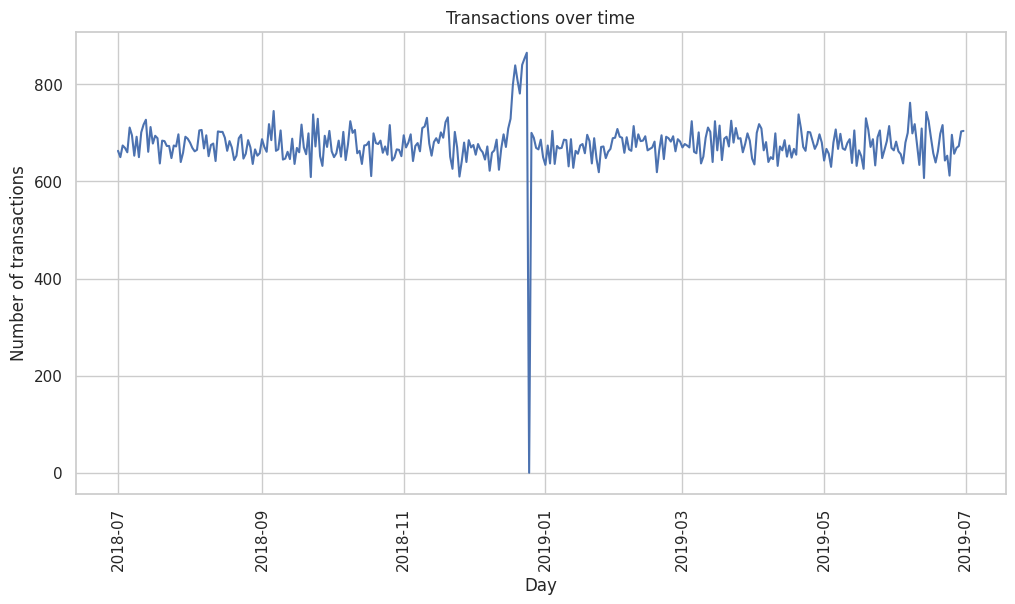

In [24]:
# Plot transactions over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='DATE', y='N', data=transactions_by_day)
plt.title('Transactions over time')
plt.xlabel('Day')
plt.ylabel('Number of transactions')
plt.xticks(rotation=90)
plt.show()

In [25]:
# Create pack size
transaction_data['PACK_SIZE'] = transaction_data['PROD_NAME'].str.extract(r'(\d+)').astype(int)

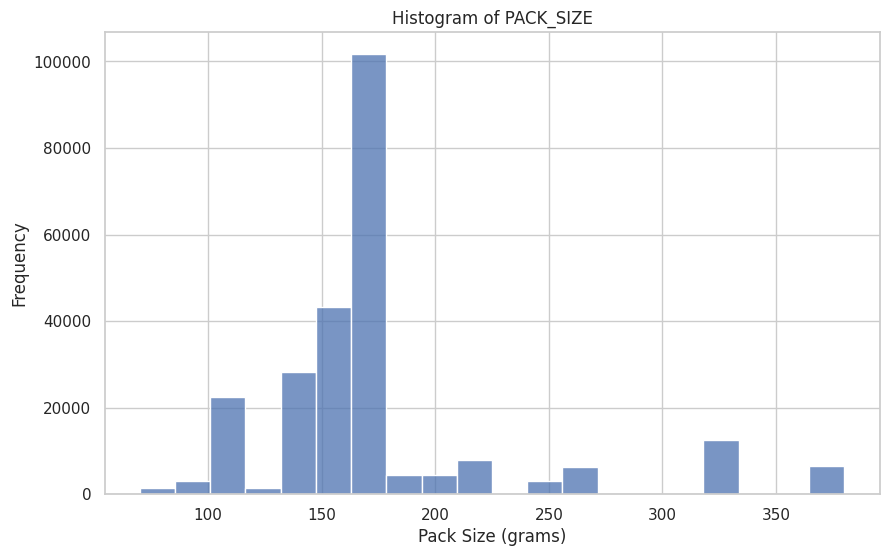

In [26]:
# Plot a histogram of PACK_SIZE
plt.figure(figsize=(10, 6))
sns.histplot(transaction_data['PACK_SIZE'], bins=20)
plt.title('Histogram of PACK_SIZE')
plt.xlabel('Pack Size (grams)')
plt.ylabel('Frequency')
plt.show()

In [27]:
# Create brand name
transaction_data['BRAND'] = transaction_data['PROD_NAME'].str.split().str[0]

# Clean brand names
transaction_data['BRAND'] = transaction_data['BRAND'].replace({'RED': 'RRD', 'SNBTS': 'SUNBITES'})

# Merge transaction data to customer data
data = pd.merge(transaction_data, customer_data, on='LYLTY_CARD_NBR', how='left')

# Check for missing customer details
print(data.isnull().sum())

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
PACK_SIZE           0
BRAND               0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64


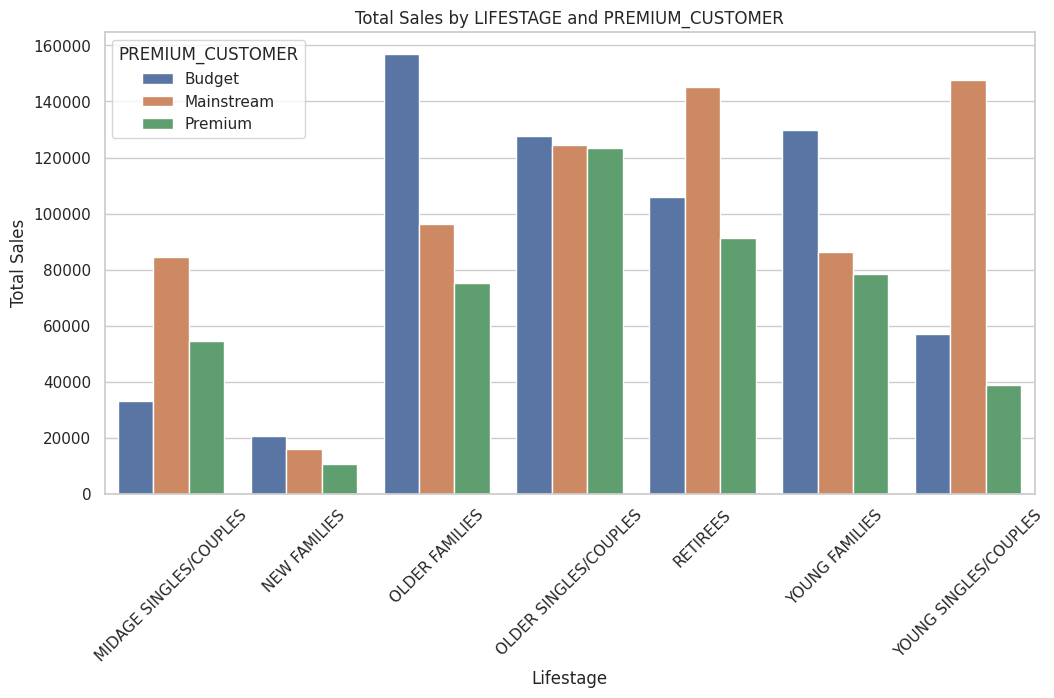

In [28]:
# Data analysis on customer segments

# Total sales by LIFESTAGE and PREMIUM_CUSTOMER
total_sales = data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index()

# Plot total sales by LIFESTAGE and PREMIUM_CUSTOMER
plt.figure(figsize=(12, 6))
sns.barplot(x='LIFESTAGE', y='TOT_SALES', hue='PREMIUM_CUSTOMER', data=total_sales)
plt.title('Total Sales by LIFESTAGE and PREMIUM_CUSTOMER')
plt.xlabel('Lifestage')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

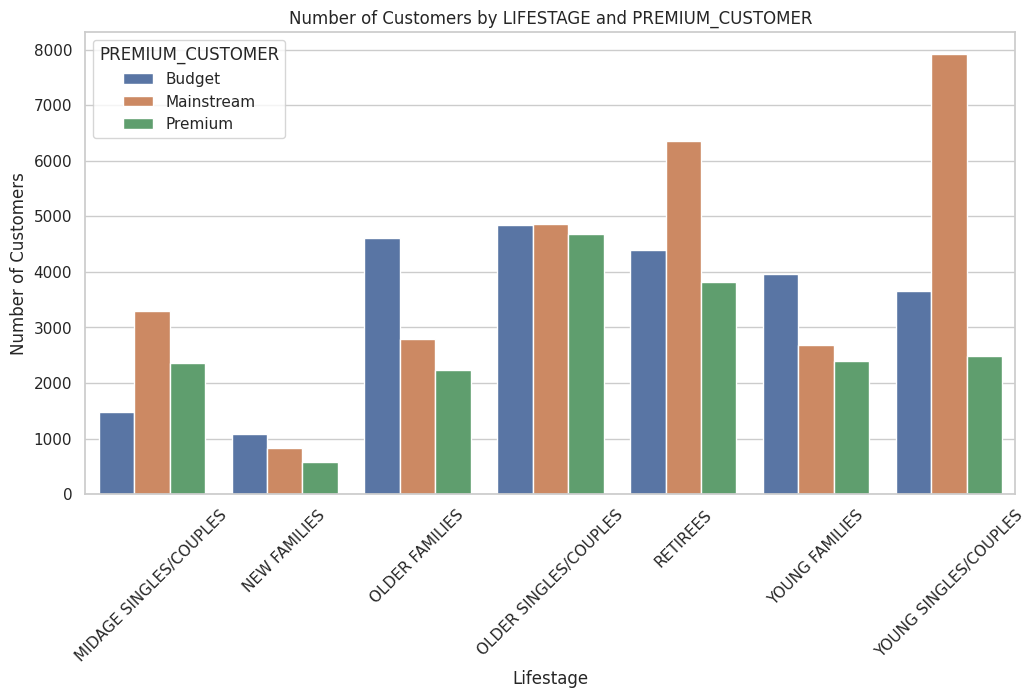

In [29]:
# Number of customers by LIFESTAGE and PREMIUM_CUSTOMER
customer_count = data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].nunique().reset_index(name='CUSTOMER_COUNT')

# Plot number of customers by LIFESTAGE and PREMIUM_CUSTOMER
plt.figure(figsize=(12, 6))
sns.barplot(x='LIFESTAGE', y='CUSTOMER_COUNT', hue='PREMIUM_CUSTOMER', data=customer_count)
plt.title('Number of Customers by LIFESTAGE and PREMIUM_CUSTOMER')
plt.xlabel('Lifestage')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

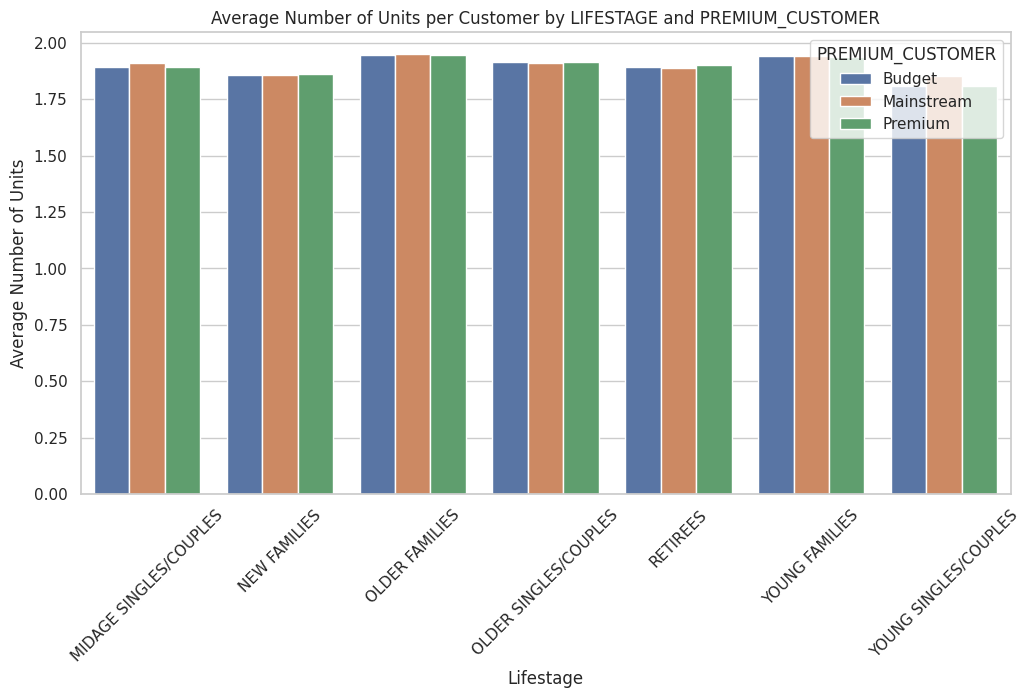

In [30]:
# Average number of units per customer by LIFESTAGE and PREMIUM_CUSTOMER
avg_units_per_customer = data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['PROD_QTY'].mean().reset_index()

# Plot average number of units per customer by LIFESTAGE and PREMIUM_CUSTOMER
plt.figure(figsize=(12, 6))
sns.barplot(x='LIFESTAGE', y='PROD_QTY', hue='PREMIUM_CUSTOMER', data=avg_units_per_customer)
plt.title('Average Number of Units per Customer by LIFESTAGE and PREMIUM_CUSTOMER')
plt.xlabel('Lifestage')
plt.ylabel('Average Number of Units')
plt.xticks(rotation=45)
plt.show()


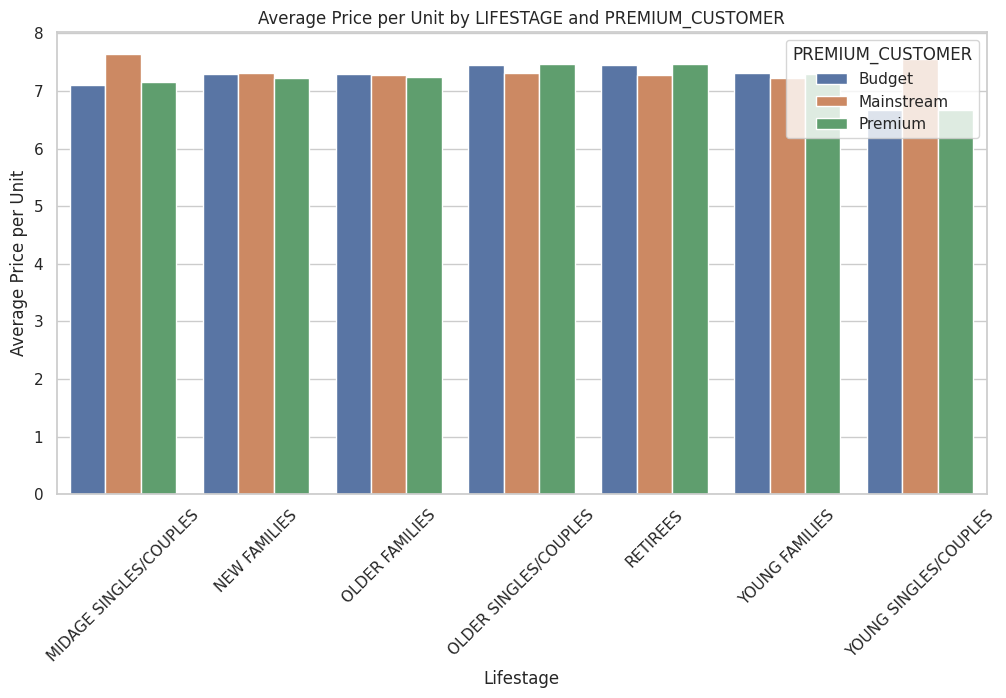

In [31]:
# Average price per unit by LIFESTAGE and PREMIUM_CUSTOMER
avg_price_per_unit = data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].mean().reset_index()

# Plot average price per unit by LIFESTAGE and PREMIUM_CUSTOMER
plt.figure(figsize=(12, 6))
sns.barplot(x='LIFESTAGE', y='TOT_SALES', hue='PREMIUM_CUSTOMER', data=avg_price_per_unit)
plt.title('Average Price per Unit by LIFESTAGE and PREMIUM_CUSTOMER')
plt.xlabel('Lifestage')
plt.ylabel('Average Price per Unit')
plt.xticks(rotation=45)
plt.show()

In [32]:
# Perform an independent t-test between mainstream vs premium and budget midage and young singles and couples
from scipy.stats import ttest_ind

mainstream = data[(data['PREMIUM_CUSTOMER'] == 'Mainstream') & (data['LIFESTAGE'].isin(['YOUNG SINGLES/COUPLES', 'MIDAGE SINGLES/COUPLES']))]
others = data[(data['PREMIUM_CUSTOMER'].isin(['Budget', 'Premium'])) & (data['LIFESTAGE'].isin(['YOUNG SINGLES/COUPLES', 'MIDAGE SINGLES/COUPLES']))]

ttest_result = ttest_ind(mainstream['TOT_SALES'], others['TOT_SALES'])
print(f'T-test p-value: {ttest_result.pvalue}')


T-test p-value: 1.9916804791117584e-239


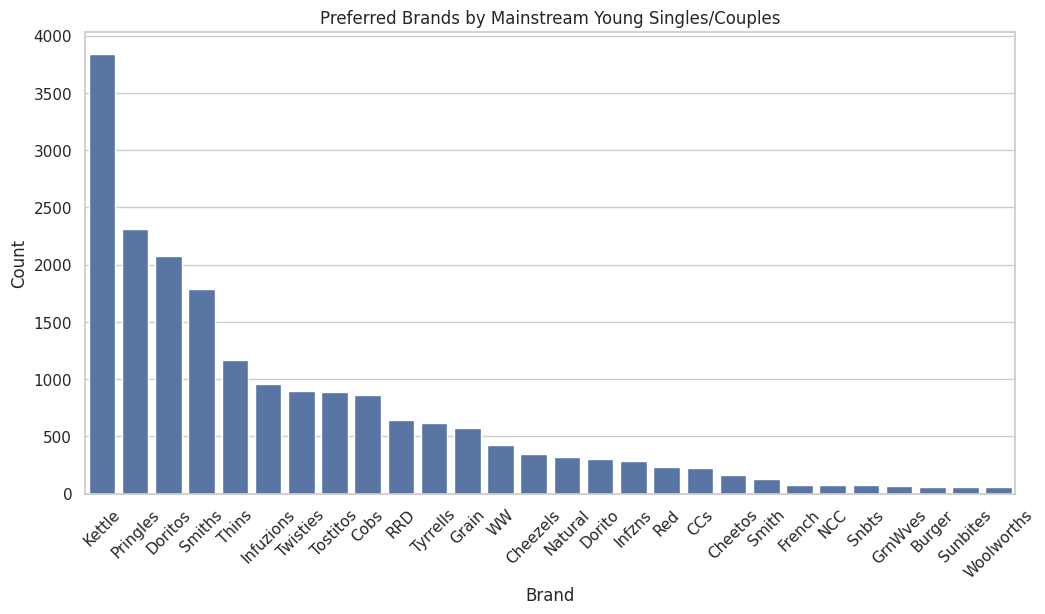

In [33]:
# Deep dive into specific customer segments for insights
# Analyze Mainstream young singles/couples preference for brands and pack sizes
mainstream_young = data[(data['PREMIUM_CUSTOMER'] == 'Mainstream') & (data['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES')]

# Preferred brands
preferred_brands = mainstream_young['BRAND'].value_counts().reset_index()
preferred_brands.columns = ['BRAND', 'COUNT']

plt.figure(figsize=(12, 6))
sns.barplot(x='BRAND', y='COUNT', data=preferred_brands)
plt.title('Preferred Brands by Mainstream Young Singles/Couples')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

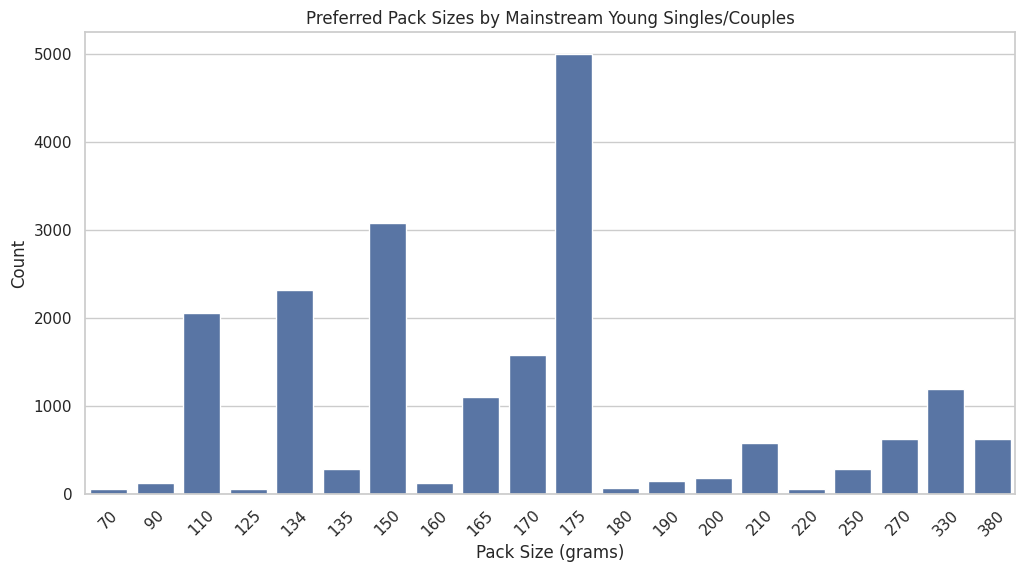

In [34]:
# Preferred pack sizes
preferred_pack_sizes = mainstream_young['PACK_SIZE'].value_counts().reset_index()
preferred_pack_sizes.columns = ['PACK_SIZE', 'COUNT']

plt.figure(figsize=(12, 6))
sns.barplot(x='PACK_SIZE', y='COUNT', data=preferred_pack_sizes)
plt.title('Preferred Pack Sizes by Mainstream Young Singles/Couples')
plt.xlabel('Pack Size (grams)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()